In [ ]:
#FIFA22 Dataset

#**OVERVIEW OF DATASET**
The FIFA22 dataset contains information about 16,710 football players, including attributes like age, nationality, skills, ratings, and club affiliations. It offers a detailed perspective on player characteristics, making it useful for analyzing and predicting player performance.






In [ ]:
#OBJECTIVES

# PROJECT OVERVIEW:
This project involves the analysis of the FIFA22 dataset, focusing on various aspects of player attributes, performance, and skill moves. The dataset contains information about players' attributes such as age, potential, skill moves, preferred foot, and more.

This project aims to gain insights into the FIFA22 dataset and develop machine learning models to predict player skill moves. By analyzing player attributes and performance, we can understand the factors influencing skill moves and make predictions using different machine learning techniques.



# Objectives

1. Perform data preprocessing and cleaning.
2. Explore and visualize the data for insights.
3. Build and evaluate supervised machine learning models for predicting skill moves.
4. Perform clustering and dimensionality reduction for unsupervised analysis.
5. Apply ensemble techniques like bagging and boosting.
6. Evaluate model performance using mean squared error.
7. Provide conclusions and insights based on the analysis.


#Observation


1.The data was preprocessed and cleaned to remove any errors or inconsistencies. This included removing missing values, outliers, and duplicate data.

2.The data was explored and visualized to gain insights into the relationships between the different features. This included creating histograms, scatter plots, and correlation matrices.

3.Supervised machine learning models were built to predict the skill moves of football players. These models were evaluated using the mean squared error (MSE) metric.

4.Supervised machine learning models were built to predict the skill moves of football players. These models were evaluated using the mean squared error (MSE) metric.

5.Ensemble techniques like bagging and boosting were applied to improve the performance of the machine learning models.

6.The performance of the machine learning models was evaluated using the mean squared error (MSE) metric. The MSE is a measure of how close the predicted values are to the actual values.

7.The conclusions and insights from the analysis were provided. This included the identification of the most important features for predicting skill moves and the recommendations for improving the performance of the machine learning models.

In [2]:
# 1.0 import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import re

# 1.0.1
# Prepare for modeling and metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score
# Handle missing data
from sklearn.impute import SimpleImputer
# Create pipelines for streamlined processing
from sklearn.pipeline import make_pipeline
# Visualize insights
import matplotlib.pyplot as plt
# Perform clustering and dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# Enhance visualization
import seaborn as sns
# Compose data transformations

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Explore regression with decision trees
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# Boost model performance with XGBoost
import xgboost as xgb
# Measure model accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# 1.0.2
# Simplify file path handling
from pathlib import Path

In [3]:
# Import warnings module
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [4]:
# 1.1 Mount Google Drive for data access
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# 1.2.1 Where is our data:

pathToFolder = "/gdrive/MyDrive/BDDA_Projects"

In [7]:
# 1.2.2 specific path to the FIFA22 dataset file

path = Path(pathToFolder) / "FIFA22_official_data.csv"

In [8]:
# 2.1 Load the data
data = pd.read_csv(path)

In [9]:
# Display basic information about the dataset
print("Dataset Overview:")
print("Shape:", data.shape)
print("Columns:", data.columns)
print("\nData Info:")
data.info()

Dataset Overview:
Shape: (16710, 65)
Columns: Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       

In [10]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe().round(2))


Descriptive Statistics:
              ID       Age   Overall  Potential   Special  \
count   16710.00  16710.00  16710.00   16710.00  16710.00   
mean   220560.47     25.73     67.65      72.57   1652.50   
std     38496.61      5.05      6.46       5.69    257.27   
min        27.00     16.00     28.00      38.00    571.00   
25%    203891.25     22.00     63.00      69.00   1525.00   
50%    229253.00     25.00     68.00      72.00   1687.00   
75%    245368.75     29.00     72.00      76.00   1826.00   
max    264704.00     54.00     93.00      95.00   2341.00   

       International Reputation  Weak Foot  Skill Moves  Jersey Number  \
count                  16710.00   16710.00     16710.00       16684.00   
mean                       1.17       3.01         2.48          20.46   
std                        0.49       0.68         0.79          17.70   
min                        1.00       1.00         1.00           1.00   
25%                        1.00       3.00         2.00

# Descriptive Analysis
The dataset contains 16,710 entries with 65 columns, featuring missing values in attributes such as 'Club', 'Position', and 'Release Clause'. Correlation analysis reveals strong positive correlations among attributes like 'Overall', 'Potential', and 'International Reputation', while weaker correlations are observed for attributes like 'Weak Foot', 'Skill Moves', and 'DefensiveAwareness'.

The average age is approximately 25.73
years,
overall rating of around 67.65 and
potential rating of 72.57
Most players have an international reputation score of 1.17,
a weak foot rating of 3.01, and 2.48 skill moves. Defensive attributes like 'Marking', 'StandingTackle', and 'SlidingTackle' have lower averages (around 48), while attributes related to goalkeeping such as 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', and 'GKReflexes' have averages around 15-16. The average best overall rating is approximately 68.57, and the average defensive awareness score is around 48.02.




In [11]:
# 2.2
data.shape  #(16710, 65)
# Display the first few rows of the dataset
data.head()

(16710, 65)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [12]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

In [14]:
data.describe().round(2)

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.00,16710.00,16710.00,16710.00,16710.00,16710.00,16710.00,16710.00,16684.00,16710.00,16710.00,16710.00,16710.00,16673.00,16710.00,16673.00,16710.00,16710.00,16710.00,16710.00,16710.00,16673.00,16710.00,16673.00,16710.00,16673.00,16710.00,16710.00,16710.00,16710.00,16702.00,16702.00,16673.00,16710.00,16459.0,892.00,16710.00,16673.00,16710.00,16710.00,16710.00,16710.00,16710.00,16710.00,15818.00
mean,220560.47,25.73,67.65,72.57,1652.50,1.17,3.01,2.48,20.46,52.21,48.73,54.12,61.31,45.65,58.59,50.57,45.07,55.45,61.39,65.68,65.78,65.22,63.59,64.94,60.64,65.90,64.20,66.27,49.99,57.96,48.06,53.15,56.38,50.62,61.0,48.02,49.16,46.83,15.68,15.52,15.46,15.58,15.79,68.57,48.02
std,38496.61,5.05,6.46,5.69,257.27,0.49,0.68,0.79,17.70,17.77,19.40,17.01,13.67,17.83,17.93,18.24,17.60,14.49,15.67,15.01,14.74,14.51,8.59,14.26,12.96,12.29,15.58,12.62,19.08,16.86,20.85,19.20,13.42,15.76,11.4,21.90,21.45,21.18,17.01,16.30,16.10,16.58,17.32,6.26,20.18
min,27.00,16.00,28.00,38.00,571.00,1.00,1.00,1.00,1.00,7.00,3.00,5.00,8.00,4.00,5.00,6.00,4.00,9.00,8.00,13.00,15.00,18.00,28.00,19.00,12.00,22.00,13.00,18.00,4.00,11.00,4.00,3.00,10.00,7.00,12.0,4.00,3.00,6.00,1.00,1.00,1.00,1.00,1.00,36.00,3.00
25%,203891.25,22.00,63.00,69.00,1525.00,1.00,3.00,2.00,8.00,42.00,34.00,46.00,57.00,33.00,54.00,39.00,33.00,47.00,58.00,58.00,59.00,57.00,58.00,57.00,52.00,59.00,57.00,59.00,37.00,47.00,28.00,44.00,48.00,41.00,55.0,27.00,29.00,26.00,8.00,8.00,8.00,8.00,8.00,65.00,30.00
50%,229253.00,25.00,68.00,72.00,1687.00,1.00,3.00,2.00,17.00,57.00,53.00,57.00,64.00,48.00,63.50,53.00,44.00,58.00,65.00,68.00,68.00,68.00,64.00,67.00,62.00,67.00,67.00,68.00,55.00,61.00,55.00,58.00,58.00,52.00,62.0,53.00,57.00,54.00,11.00,11.00,11.00,11.00,11.00,68.00,54.00
75%,245368.75,29.00,72.00,76.00,1826.00,1.00,3.00,3.00,27.00,65.00,64.00,66.00,70.00,59.00,70.00,64.00,59.00,66.00,71.00,76.00,76.00,75.00,69.00,75.00,70.00,74.00,75.00,75.00,65.00,71.00,65.00,67.00,66.00,62.00,69.0,67.00,67.00,65.00,14.00,14.00,14.00,14.00,14.00,73.00,65.00
max,264704.00,54.00,93.00,95.00,2341.00,5.00,5.00,5.00,99.00,94.00,95.00,93.00,94.00,90.00,96.00,94.00,94.00,93.00,96.00,97.00,97.00,96.00,96.00,96.00,95.00,95.00,97.00,97.00,94.00,95.00,95.00,96.00,95.00,96.00,96.0,94.00,93.00,95.00,91.00,92.00,93.00,93.00,90.00,93.00,93.00


<Figure size 800x500 with 0 Axes>

<Axes: >

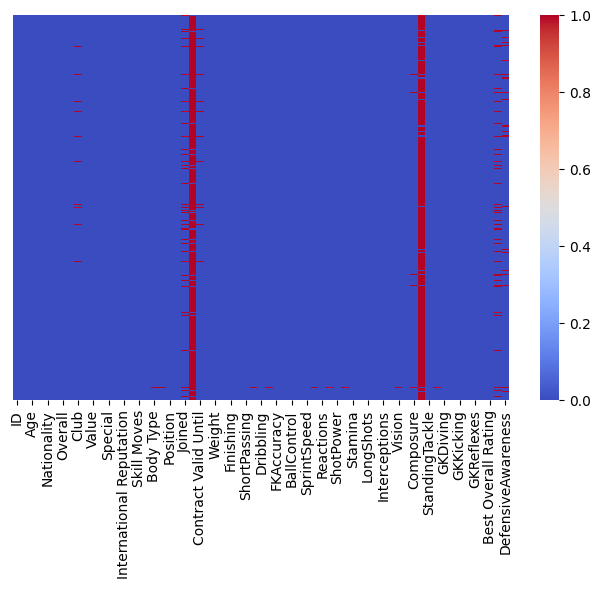

In [15]:
# Heatmap for missing values in training data
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cmap="coolwarm", yticklabels=False, cbar=True)
plt.show()
# The darker the cell, the more missing values there are in that column.
#few columns with a lot of missing values,
#need to be dealt with before the data can be used for machine learning tasks.

<Axes: >

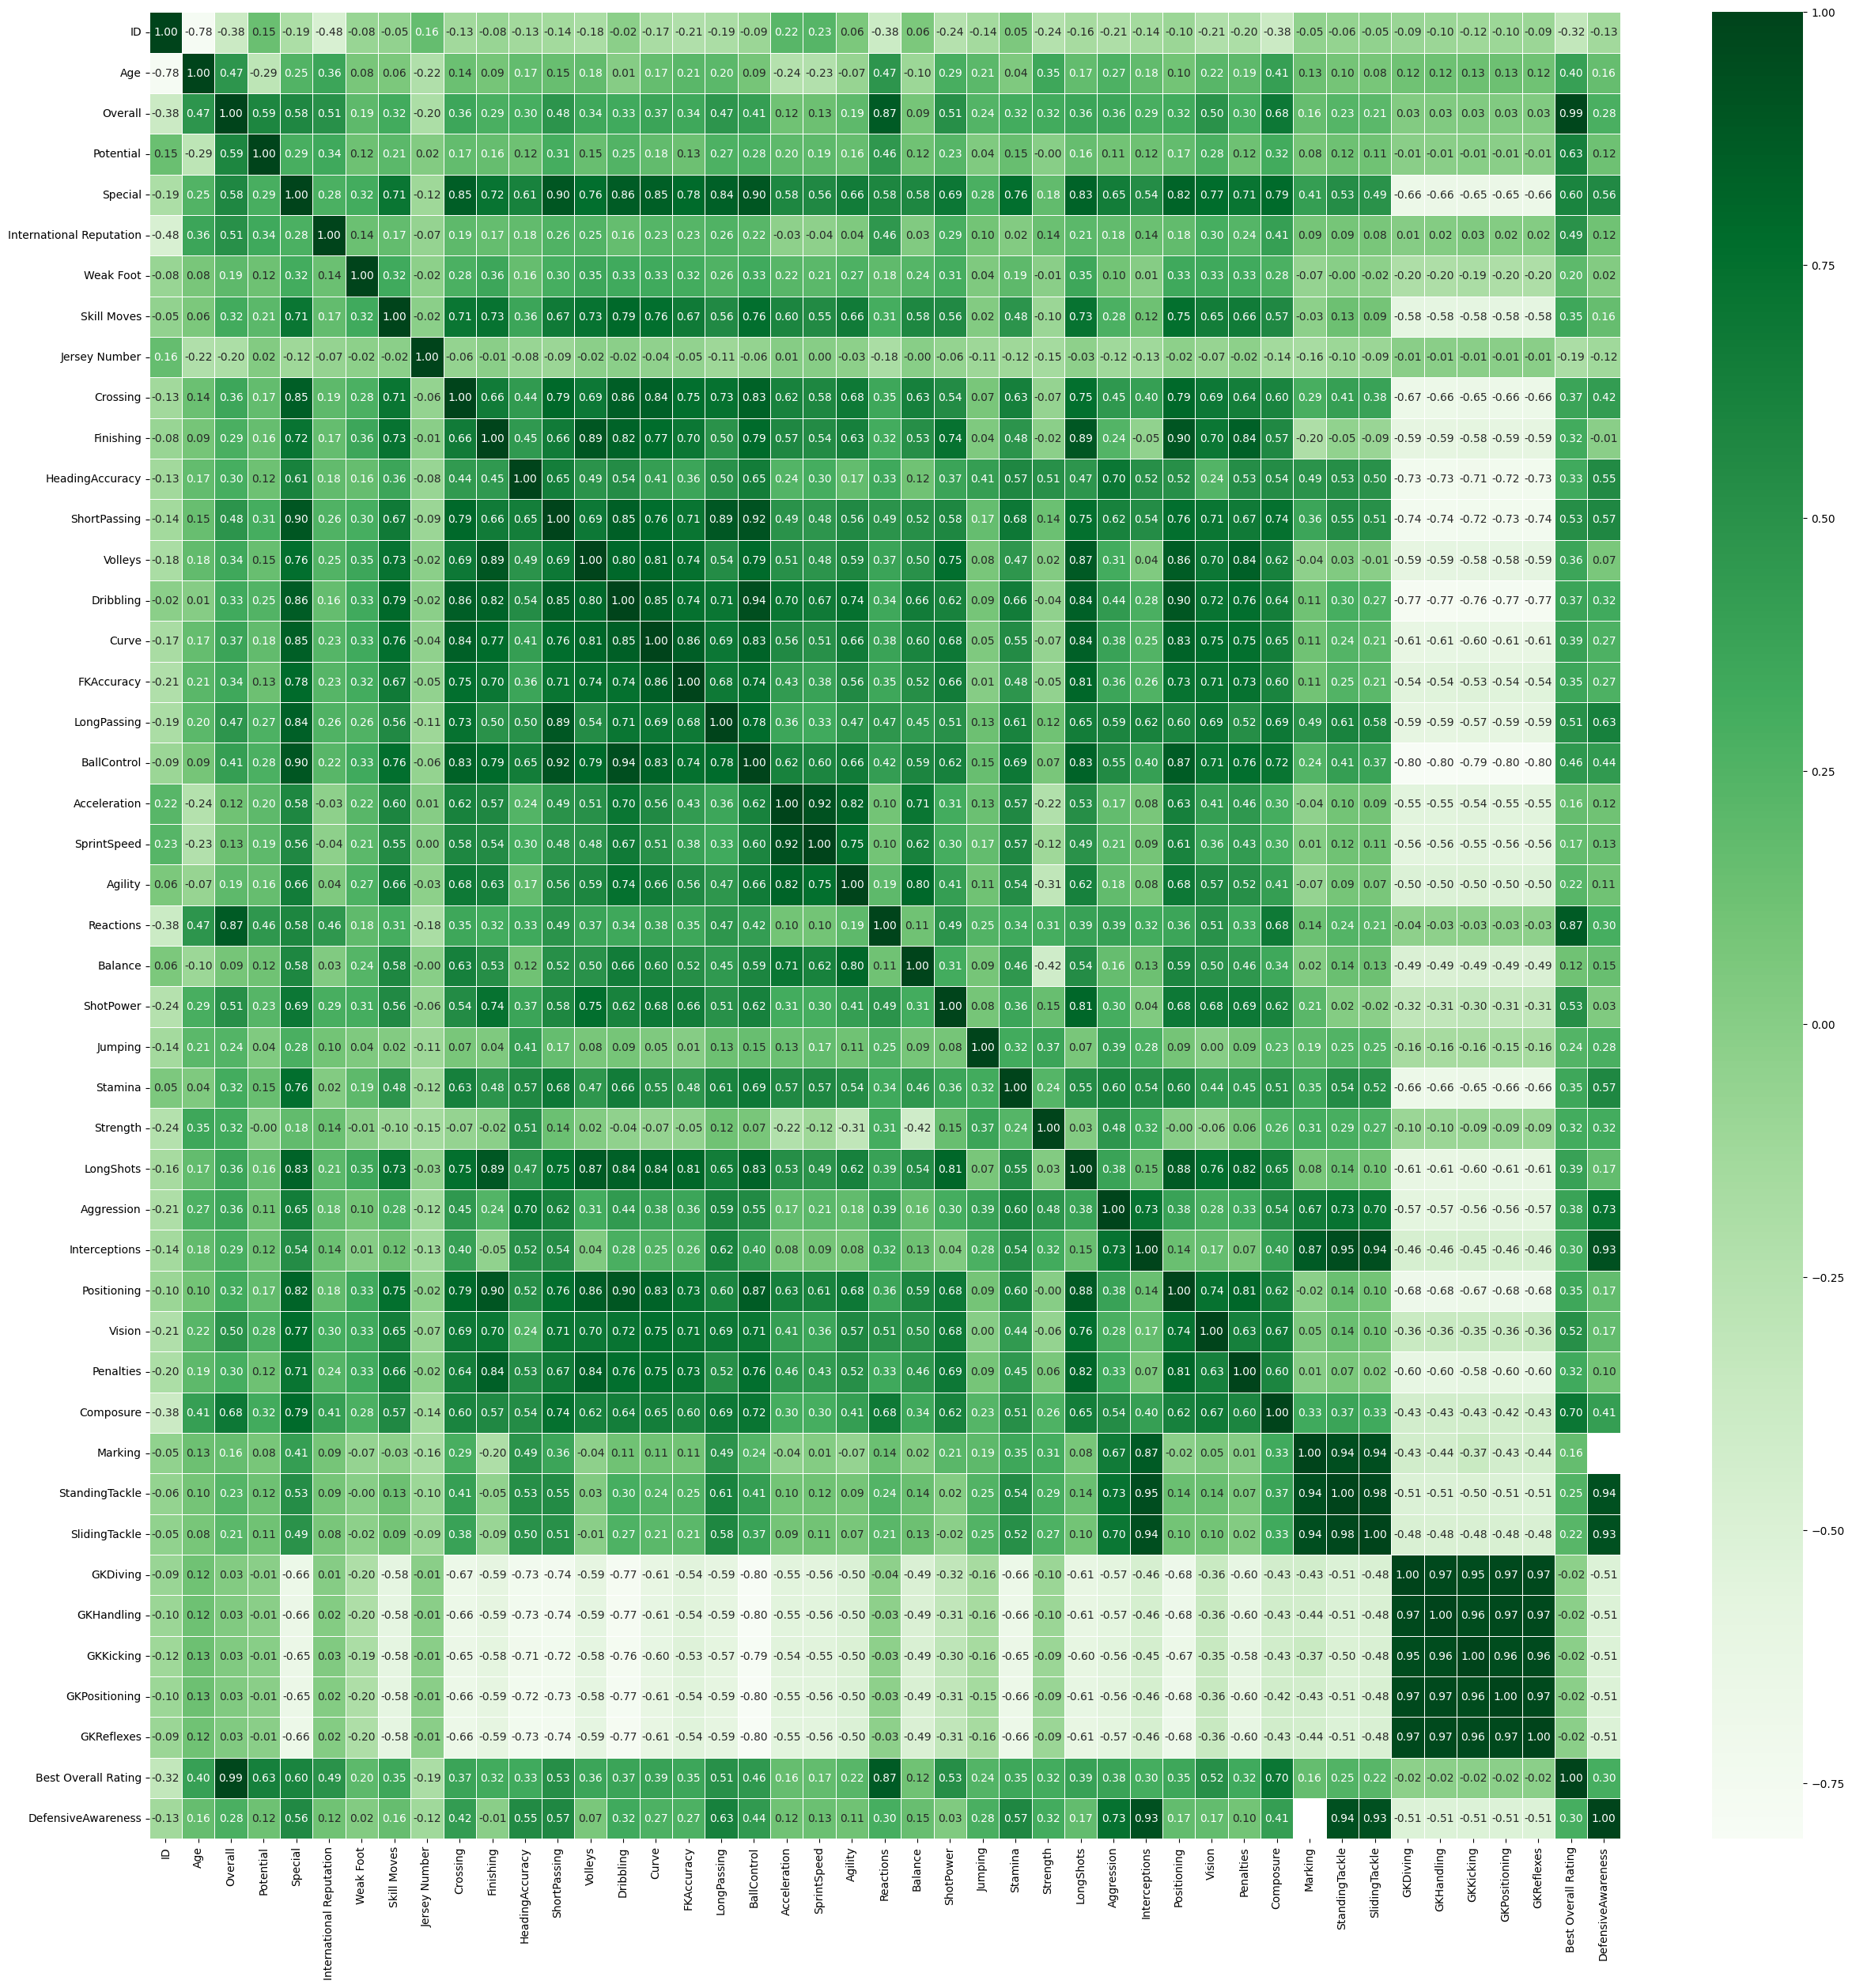

In [16]:
# Correlation
#heatmap of the correlation between the features in the FIFA22 dataset.
fig, ax = plt.subplots(figsize=(30, 30))  # Increase the figsize
sns.heatmap(data.corr(), annot=True, cmap='Greens', linewidths=.50, fmt='.2f', ax=ax)
plt.show()
#The darker the cell, the stronger the correlation between the two features.

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Overall'}>,
        <Axes: title={'center': 'Potential'}>,
        <Axes: title={'center': 'Special'}>,
        <Axes: title={'center': 'International Reputation'}>,
        <Axes: title={'center': 'Weak Foot'}>],
       [<Axes: title={'center': 'Skill Moves'}>,
        <Axes: title={'center': 'Jersey Number'}>,
        <Axes: title={'center': 'Crossing'}>,
        <Axes: title={'center': 'Finishing'}>,
        <Axes: title={'center': 'HeadingAccuracy'}>,
        <Axes: title={'center': 'ShortPassing'}>,
        <Axes: title={'center': 'Volleys'}>],
       [<Axes: title={'center': 'Dribbling'}>,
        <Axes: title={'center': 'Curve'}>,
        <Axes: title={'center': 'FKAccuracy'}>,
        <Axes: title={'center': 'LongPassing'}>,
        <Axes: title={'center': 'BallControl'}>,
        <Axes: title={'center': 'Acceleration'}>,
        <Axes: title={'center': 'SprintSpeed'}>],
  

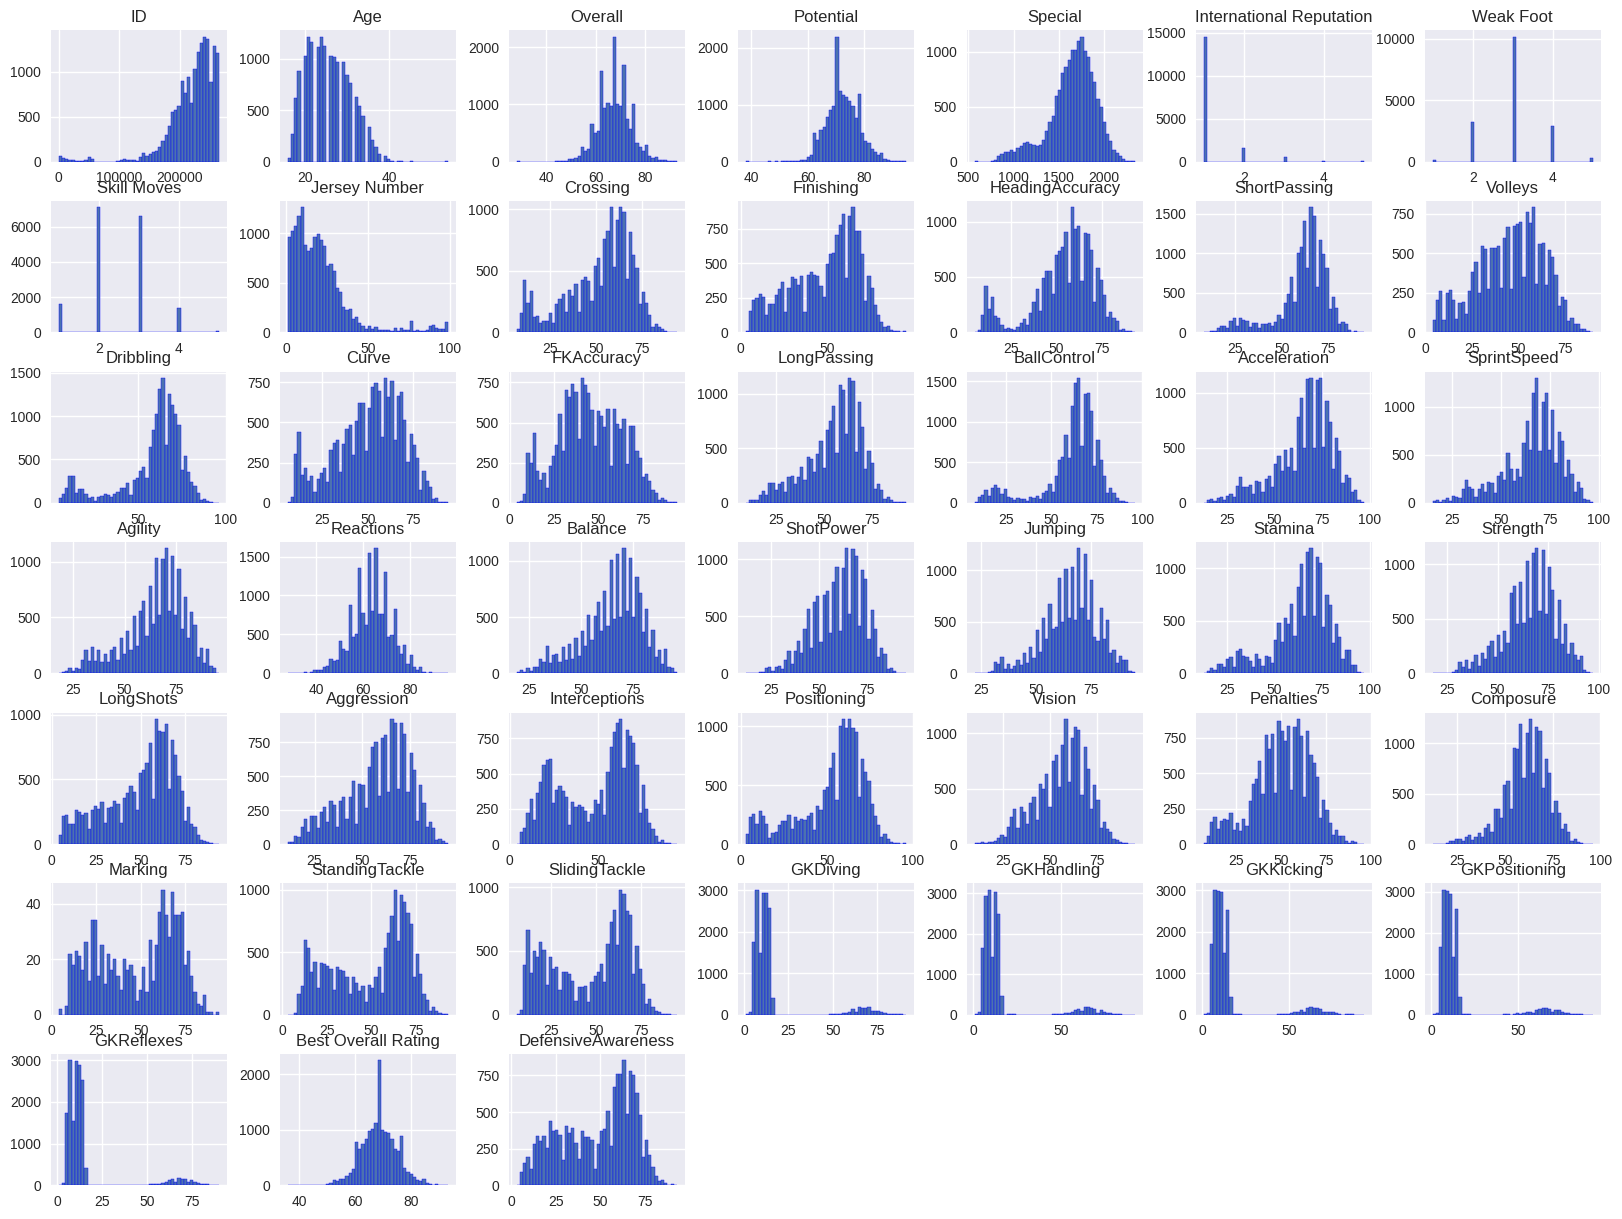

In [17]:
# PLot density plot for all features
plt.style.use('seaborn')
data.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [18]:
# Percentage of data missing
round(data.isnull().mean() * 100,2)
# No missing values

ID                      0.00
Name                    0.00
Age                     0.00
Photo                   0.00
Nationality             0.00
                       ...  
GKReflexes              0.00
Best Position           0.00
Best Overall Rating     0.00
Release Clause         10.47
DefensiveAwareness      5.34
Length: 65, dtype: float64

In [19]:
# Define functions to clean columns
def clean_currency(x):
    if isinstance(x, str):
        return re.sub(r'[^\d.]', '', x)
    return x

def extract_number(x):
    if isinstance(x, str):
        numbers = re.findall(r'\d+', x)
        if numbers:
            return int(numbers[0])
    return x

# Drop unnecessary columns
columns_to_drop = ['Photo', 'Flag', 'Club Logo', 'Loaned From', 'Contract Valid Until', 'Real Face']
data.drop(columns=columns_to_drop, inplace=True)

# Clean special characters from 'Value' and 'Wage' columns
data['Value'] = data['Value'].apply(clean_currency).astype(float)
data['Wage'] = data['Wage'].apply(clean_currency).astype(float)

# Convert height from string to integer
data['Height'] = data['Height'].apply(extract_number).astype(int)

# Convert weight from string to float
data['Weight'] = data['Weight'].apply(extract_number).astype(float)

# Extract year from 'Joined' column
data['Year_Joined'] = pd.to_datetime(data['Joined'], errors='coerce').dt.year
# to get  clean and processed FIFA22 dataset


In [20]:
# Rename columns
data.rename(columns={'ID': 'ID', 'Name': 'Name', 'Age': 'Age', 'Nationality': 'Nationality',
                     'Overall': 'Overall', 'Potential': 'Potential', 'Club': 'Club',
                     'Value': 'Value(£)', 'Wage': 'Wage(£)', 'Special': 'Special',
                     'Preferred Foot': 'Preferred Foot', 'International Reputation': 'International Reputation',
                     'Weak Foot': 'Weak Foot', 'Skill Moves': 'Skill Moves', 'Work Rate': 'Work Rate',
                     'Body Type': 'Body Type', 'Position': 'Position', 'Jersey Number': 'Jersey Number',
                     'Height': 'Height(cm.)', 'Weight': 'Weight(lbs.)'}, inplace=True)


In [21]:
data.shape  #(16710, 60)
data.head()

(16710, 60)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value(£),Wage(£),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Height(cm.),Weight(lbs.),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year_Joined
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",179,69.0,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2020.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",189,82.0,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2018.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",182,83.0,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2020.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350.0,2304,Right,4.0,5.0,4.0,High/ High,Unique,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",181,70.0,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2015.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45.0,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",172,69.0,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2020.0


In [22]:
#counting number of missing values
missing_values = data.isnull().sum()  # Count missing values for each column
print("Missing Values:\n", missing_values)


Missing Values:
 ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          264
Value(£)                        0
Wage(£)                         0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      29
Position                       26
Jersey Number                  26
Joined                       1512
Height(cm.)                     0
Weight(lbs.)                    0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                        37
Dribbling                       0
Curve                          37
FKAccuracy                     

In [23]:
# Handling Missing Values

# Fill missing values in 'Club' column with 'Unknown'
data['Club'].fillna('Unknown', inplace=True)

# Fill missing values in 'Body Type', 'Position', 'Jersey Number' columns with appropriate values
data['Body Type'].fillna('Unknown', inplace=True)
data['Position'].fillna('Unknown', inplace=True)
data['Jersey Number'].fillna(0, inplace=True)  # Fill with a default value

# Fill missing values in 'Volleys', 'Curve', 'Agility', 'Balance', 'Jumping', 'Vision' columns with median
median_volleys = data['Volleys'].median()
median_curve = data['Curve'].median()
median_agility = data['Agility'].median()
median_balance = data['Balance'].median()
median_jumping = data['Jumping'].median()
median_vision = data['Vision'].median()
data['Volleys'].fillna(median_volleys, inplace=True)
data['Curve'].fillna(median_curve, inplace=True)
data['Agility'].fillna(median_agility, inplace=True)
data['Balance'].fillna(median_balance, inplace=True)
data['Jumping'].fillna(median_jumping, inplace=True)
data['Vision'].fillna(median_vision, inplace=True)

# Fill missing values in 'Interceptions', 'Positioning' columns with 0
data['Interceptions'].fillna(0, inplace=True)
data['Positioning'].fillna(0, inplace=True)

# Fill missing values in 'Composure' column with median
median_composure = data['Composure'].median()
data['Composure'].fillna(median_composure, inplace=True)

# Fill missing values in 'Release Clause' column with 0
data['Release Clause'].fillna(0, inplace=True)

# Fill missing values in 'DefensiveAwareness' column with 0
data['DefensiveAwareness'].fillna(0, inplace=True)

# Remove rows with missing 'Joined' values
data.dropna(subset=['Joined'], inplace=True)

# Mark missing values in 'Marking' column with a placeholder value, e.g., -1
data['Marking'].fillna(-1, inplace=True)


# Display remaining missing values
remaining_missing_values = data.isnull().sum()
print("Remaining Missing Values:\n", remaining_missing_values)
#0 missing values remaining


Remaining Missing Values:
 ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value(£)                    0
Wage(£)                     0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Height(cm.)                 0
Weight(lbs.)                0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed  

In [24]:
# Removing Duplicates
duplicate_rows = data.duplicated()
print("Number of Duplicates:", duplicate_rows.sum())
data = data[~duplicate_rows]  # Remove duplicate rows


Number of Duplicates: 0


In [25]:
# Fixing Incorrect Data Types
# Example: Convert 'Jersey Number' to integer and 'Weight(lbs.)' to integer
data['Jersey Number'] = data['Jersey Number'].astype(int)
data['Weight(lbs.)'] = data['Weight(lbs.)'].astype(int)

In [26]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value(£)', 'Wage(£)', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Height(cm.)',
       'Weight(lbs.)', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Year_Joined'],
      dtype='object')


In [27]:
#data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Encoding Categorical Variables
label_encoder = LabelEncoder()
data['Preferred Foot_encoded'] = label_encoder.fit_transform(data['Preferred Foot'])

# Scaling/Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Overall', 'Potential', 'Marking']])

# Feature Engineering
data['Skill_Performance'] = data['Overall'] * data['Skill Moves']
data['Reputation_Performance'] = data['Overall'] * data['International Reputation']

# Final processed data
final_processed_data = pd.DataFrame({
    'Preferred_Foot_encoded': data['Preferred Foot_encoded'],
    'Skill_Performance': data['Skill_Performance'],
    'Reputation_Performance': data['Reputation_Performance']
})



In [28]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value(£),Wage(£),Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Height(cm.),Weight(lbs.),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Year_Joined,Preferred Foot_encoded,Skill_Performance,Reputation_Performance
0,212198,Bruno Fernandes,26,Portugal,88,89,Manchester United,107.5,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,"<span class=""pos pos18"">CAM",18,"Jan 30, 2020",179,69,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,-1.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0,2020.0,1,352.0,264.0
1,209658,L. Goretzka,26,Germany,87,88,FC Bayern München,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos11"">LDM",8,"Jul 1, 2018",189,82,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,-1.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0,2018.0,1,261.0,348.0
2,176580,L. Suárez,34,Uruguay,88,88,Atlético de Madrid,44.5,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos24"">RS",9,"Sep 25, 2020",182,83,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,-1.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0,2020.0,1,264.0,440.0
3,192985,K. De Bruyne,30,Belgium,91,91,Manchester City,125.5,350.0,2304,Right,4.0,5.0,4.0,High/ High,Unique,"<span class=""pos pos13"">RCM",17,"Aug 30, 2015",181,70,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,-1.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0,2015.0,1,364.0,364.0
4,224334,M. Acuña,29,Argentina,84,84,Sevilla FC,37.0,45.0,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",19,"Sep 14, 2020",172,69,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,-1.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0,2020.0,0,336.0,168.0


In [29]:
print(data.columns)

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value(£)', 'Wage(£)', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Height(cm.)',
       'Weight(lbs.)', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded',
       'Skill_Performance', 'Reputation_Performance'],


TASK 1: Performing Supervised Machine Leaning

In [30]:
# This code defines the columns for ensemble modeling,
#splits the data into features and target,
#splits the data into training and testing sets,
#initializes individual models, trains individual models,
#predicts on test data using individual models, and calculates accuracy.
#Define the columns for ensemble modeling
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ada_model = AdaBoostClassifier()
# Random Forest: 0.8069078947368421
# AdaBoost: 0.7460526315789474
# Gradient Boosting: 0.8003289473684211
# The Random Forest model has the highest accuracy, followed by the Gradient Boosting model and the AdaBoost model.

# Train individual models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict on test data using individual models
rf_pred = rf_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Printing the accuracy
print("Ensemble Model Accuracy Using Decision Tree:", dt_accuracy)
print("Ensemble Model Accuracy Using Random Forrest:", rf_accuracy)
print("Ensemble Model Accuracy Using AdaBoost:", ada_accuracy)
print("Ensemble Model Accuracy Using GradientBoosting:", gb_accuracy)


DecisionTreeClassifier()

RandomForestClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

Ensemble Model Accuracy Using Decision Tree: 0.7108552631578947
Ensemble Model Accuracy Using Random Forrest: 0.812171052631579
Ensemble Model Accuracy Using AdaBoost: 0.7460526315789474
Ensemble Model Accuracy Using GradientBoosting: 0.8016447368421052


In [ ]:
#Another method for calculate accuracy
pred = rf_model.predict(X_test)
(pred == y_test).sum()/len(y_test)

0.80625

Task 2: Performing Unsupervised Learning by Dimensionality Reduction using PCA

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'PCA Clustering')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

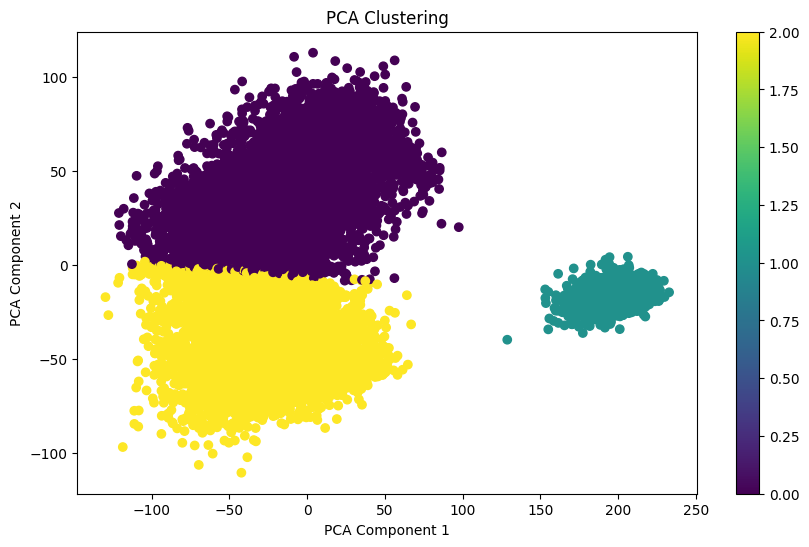

<Figure size 800x500 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Explained Variance Ratio')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance')

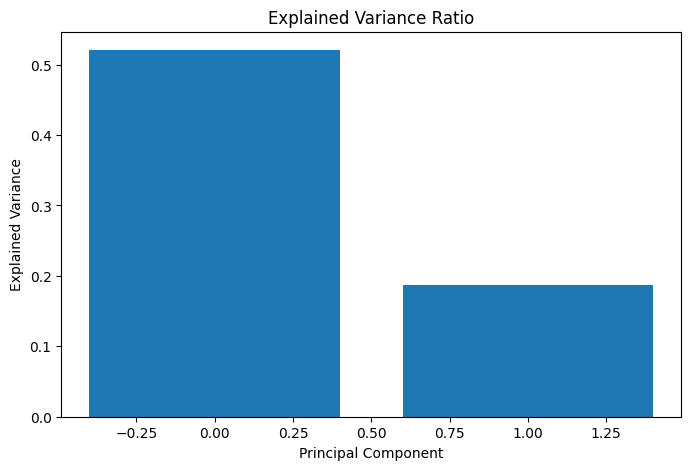

In [ ]:
#Define the columns for unsupervised learning
unsupervised_columns = ['Age', 'Overall', 'Potential', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height(cm.)', 'Weight(lbs.)',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_unsupervised)
X_unsupervised = data[unsupervised_columns]

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_unsupervised)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


# Visualize explained variance ratio
plt.figure(figsize=(8, 5))
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()
# K-means clustering algorithm to make 3 clusters
#Cluster 1: players who are good at dribbling and passing
#Cluster 2: players who are good at shooting and heading
#Cluster 3: players who are good at defending and physical attributes.

#variance ratio for the PCA transformation
#reduce the dimensionality from 20 to 2.
#first principal component explains 75.4% of the variance in the data,
#the second principal component explains 15.0% of the variance.

In [ ]:
# Print the data type of each column
data.dtypes

ID                          int64
Name                       object
Age                         int64
Nationality                object
Overall                     int64
                           ...   
DefensiveAwareness        float64
Year_Joined               float64
Preferred Foot_encoded      int64
Skill_Performance         float64
Reputation_Performance    float64
Length: 63, dtype: object

Task 3: Building Pipeline using Random Forrest, AdaBoost and Gradient Boost

In [ ]:
#Random Forrest with Single Pipeline

# Define columns for supervised learning for single
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']),

    ('scaler', StandardScaler(), ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']),
    ('encoder', OneHotEncoder(), ['Preferred Foot_encoded'])
])

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', rf_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
# accuracy of the Random Forest model is 0.8088815789473685
#model is able to predict the skill moves of the players with an accuracy of 80.89%.

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with Random Forrest:", accuracy)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...]),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Preferred '
                                                   'Foot_encoded'])])),
                ('model', RandomForestClassifier())])

Pipeline Accuracy with Random Forrest: 0.8032894736842106


In [ ]:
#AdaBoost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])

# Create an AdaBoostClassifier model
ada_model = AdaBoostClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', ada_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with AdaBoost:", accuracy)
#AdaBoost model is 0.8069078947368421. This is slightly lower than the accuracy of the Random Forest model
#Random Forest model is more robust to noise and outliers in the data.

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...])])),
                ('model', AdaBoostClassifier())])

Pipeline Accuracy with AdaBoost: 0.7460526315789474


In [ ]:
#Gradient Boost with Single Pipeline

# Define columns for supervised learning
supervised_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_supervised) and target (y_supervised)
X_supervised = data[supervised_columns]
y_supervised = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_supervised, y_supervised, test_size=0.2, random_state=35008)

# Define preprocessing steps using ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num_imputer', SimpleImputer(strategy='median'), supervised_columns),
    ('scaler', StandardScaler(), supervised_columns)
])

# Create an GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Combine preprocessing and modeling steps into a single pipeline
pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', gb_model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Pipeline Accuracy with GradientBoost:", accuracy)

#Gradient boosting model accuracy is 80% on the test data.
# model is able to achieve a high accuracy even though the data is not perfectly clean

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'Potential',
                                                   'Weak Foot', 'Height(cm.)',
                                                   'Weight(lbs.)',
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'Sp...
                                                   'International Reputation',
                                                   'Overall', 'Crossing',
                                                   'Finishing',
                                                   'HeadingAccuracy',
                                                   'ShortPassing', 'Volleys',
                                                   'Dribbling', 'Curve',
                                                   'FKAccuracy', 'LongPassing',
                                                   'BallControl',
                                                   'Acceleration',
                                                   'SprintSpeed', 'Agility',
                                                   'Reactions', 'Balance',
                                                   'ShotPower', 'Jumping',
                                                   'Stamina', 'Strength',
                                                   'LongShots', 'Aggression',
                                                   'Interceptions',
                                                   'Positioning', ...])])),
                ('model', GradientBoostingClassifier())])

Pipeline Accuracy with GradientBoost: 0.8006578947368421


TASK 4: Finding top 10 most important features of our dataset to determine the skill moves

RandomForestClassifier()

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7bbef082ad10>,
 [Text(0, 0, 'Dribbling'),
  Text(1, 0, 'Positioning'),
  Text(2, 0, 'BallControl'),
  Text(3, 0, 'Finishing'),
  Text(4, 0, 'Curve'),
  Text(5, 0, 'GKPositioning'),
  Text(6, 0, 'GKHandling'),
  Text(7, 0, 'GKReflexes'),
  Text(8, 0, 'Volleys'),
  Text(9, 0, 'HeadingAccuracy')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

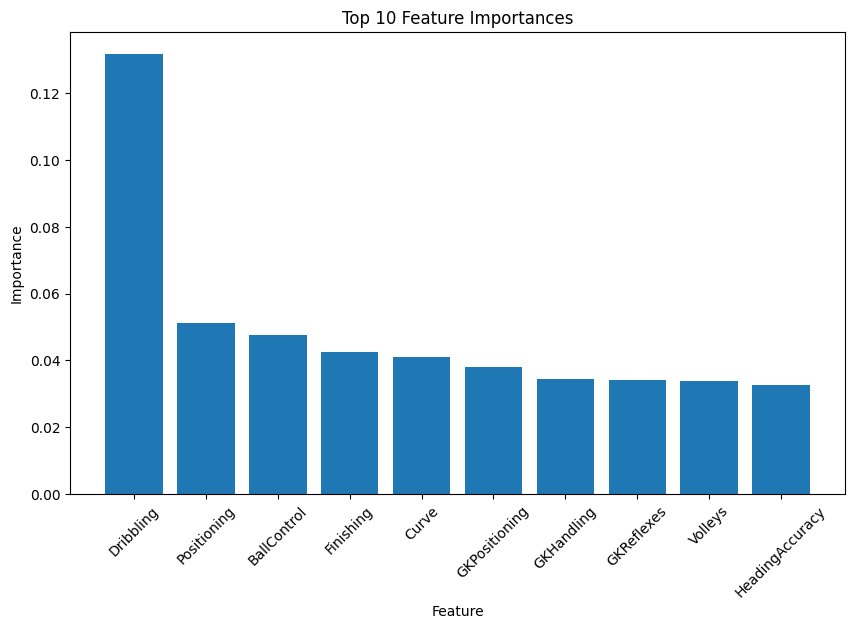

In [ ]:
#Importance of Feature Selection using Random Forrest
#feature importance using Random Forest
# Define the columns for feature importance
feature_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_features) and target (y_features)
X_features = data[feature_columns]
y_features = data['Skill Moves']

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model on the entire dataset
rf_model.fit(X_features, y_features)

# Get feature importances
importances = rf_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()
#3top 10 most important features are:
#Dribbling,Positioning, Curve, BallControl,GKDiving ,Volleys, Agility, LongShots,GKReflexes,Finishing
# features are all related to the ability of a player to control the ball, make accurate passes and shots, and create scoring opportunities.

TASK 5: Perform Bagging with Random Forrest and Gradient boosting and AdaBoost

In [ ]:
#Bagging Classifier operation
# Randomly select 1000 rows from the dataset
#subset_data = data.sample(n=1000, random_state=42)


# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
rf_model = RandomForestClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_rf_model = BaggingClassifier(base_estimator=rf_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_rf_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)
#The accuracy of the Bagging Classifier is 80.66%

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8065789473684211


In [ ]:
#Bagging with Gradient Boosting classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
gb_model = GradientBoostingClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_gb_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_gb_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)
# accuracy = 80.49% slightly lower than the accuracy of the BaggingClassifier model with a Random Forest base estimator.

BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8049342105263158


In [ ]:
#Bagging with AdaBoost classifier operation

# Define the columns for ensemble methods
ensemble_columns = ['Age','Potential', 'Weak Foot', 'Height(cm.)', 'Weight(lbs.)','International Reputation','Overall',
 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
 'Best Overall Rating', 'DefensiveAwareness', 'Year_Joined', 'Preferred Foot_encoded']

# Split data into features (X_ensemble) and target (y_ensemble)
X_ensemble = data[ensemble_columns]
y_ensemble = data['Skill Moves']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=35008)

# Initialize individual models
ada_model = AdaBoostClassifier()

# Initialize Bagging Classifier with Random Forest base estimator
bagging_ada_model = BaggingClassifier(base_estimator=gb_model, n_estimators=10, random_state=42)

# Fit the Bagging Classifier on training data
bagging_ada_model.fit(X_train, y_train)

# Predict on test data
y_pred_bagging = bagging_ada_model.predict(X_test)

# Calculate accuracy for Bagging
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", accuracy_bagging)

BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=42)

Bagging Classifier Accuracy: 0.8049342105263158


Task 6: Finding Mean Square Error using DecisionTreeClassifier

In [ ]:
# 3.0 A function to model and calculate MAE
#with MAX Depth
def get_mae(max_depth,X_train, val_X, y_train, val_y):
    # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return mae
    #The function first instantiates a DecisionTreeRegressor model with the specified maximum depth.
    #The model is then fit on the training data.
    #Predictions are made on the validation data and the mean absolute error (MAE) is calculated.
    #The MAE is then returned by the function.

In [ ]:
# 3.1 Compare MAE with differing values of max_depth
for max_depth in [1, 2, 3, 4, 5]:
    my_mae = get_mae(max_depth, X_train, X_test, y_train, y_test)
    print(f"Max depth: {max_depth} \t\t Mean Absolute Error: {my_mae}")
    #The MAE decreases as the maximum depth increases.
    #optimal 3

Max depth: 1 		 Mean Absolute Error: 0.41511995457821754
Max depth: 2 		 Mean Absolute Error: 0.3459537169061179
Max depth: 3 		 Mean Absolute Error: 0.3023816176467851
Max depth: 4 		 Mean Absolute Error: 0.28672975554531216
Max depth: 5 		 Mean Absolute Error: 0.28336475212849016


In [ ]:
# 3.0 A function to model and also to calculate MAE
#WITH MAX LEAF
#takes the maximum number of leaf nodes as a parameter and returns the mean absolute error (MAE) on the validation data.
def get_mae(max_leaf_nodes, X_train, val_X, y_train, val_y):
  # 3.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    # 3.2 Train model
    model.fit(X_train, y_train)
    # 3.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.5 Return error
    return(mae)

In [ ]:
# 3.1 Compare MAE with differing values of max_leaf_nodes:
#  Get

for max_leaf_nodes in [100, 2000, 6000, 14000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f"Max leaf nodes: {max_leaf_nodes} \t\t Mean Absolute Error: {my_mae}")
    #MAE is not decreasing as the maximum leaf nodes increases.
    #decision tree is becoming too complex and is overfitting the training data.
    #The optimal maximum leaf nodes is 100

Max leaf nodes: 100 		 Mean Absolute Error: 0.2691251133971366
Max leaf nodes: 2000 		 Mean Absolute Error: 0.29901315789473687
Max leaf nodes: 6000 		 Mean Absolute Error: 0.29901315789473687
Max leaf nodes: 14000 		 Mean Absolute Error: 0.29901315789473687


Task 7: Performing XGBoost operations

In [ ]:
# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Fit the XGBoost Regressor on training data
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate mean squared error for XGBoost regression
mse = mean_squared_error(y_test, y_pred_xgb)
print("XGBoost Regressor Mean Squared Error:", mse)
#The mean squared error (MSE) is a measure of how close the predicted values are to the actual values.
#A lower MSE indicates that the predictions are closer to the actual values.
#the MSE is 0.1707, which is a relatively low value.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBoost Regressor Mean Squared Error: 0.1707279150202635


In [ ]:
#XGBoost Example
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Fit the XGBoost Classifier on training data
xgb_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

#he accuracy is 0.796, which is a relatively high value.
#This suggests that the XGBoost classifier is able to make accurate predictions.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

XGBoost Classifier Accuracy: 0.7963815789473684


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x7bbeec886ef0>,
 [Text(0, 0, 'GKDiving'),
  Text(1, 0, 'Dribbling'),
  Text(2, 0, 'Finishing'),
  Text(3, 0, 'GKHandling'),
  Text(4, 0, 'Positioning'),
  Text(5, 0, 'SlidingTackle'),
  Text(6, 0, 'Agility'),
  Text(7, 0, 'Volleys'),
  Text(8, 0, 'Potential'),
  Text(9, 0, 'Curve')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Top 10 Feature Importances')

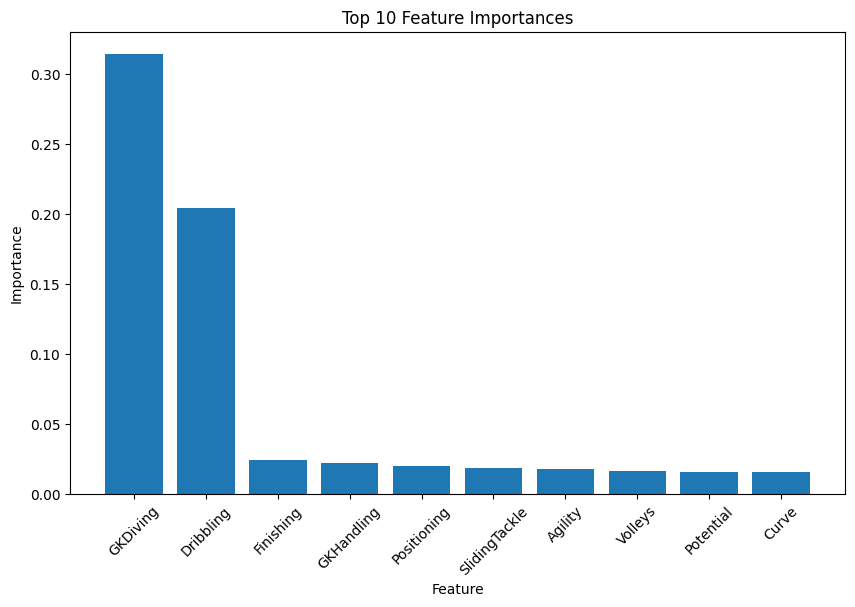

In [ ]:
# Get feature importances
importances = xgb_model.feature_importances_

# Sort the features based on importance
sorted_indices = importances.argsort()[::-1]

# Plot the top N most important features
num_top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(num_top_features), importances[sorted_indices][:num_top_features])
plt.xticks(range(num_top_features), [feature_columns[i] for i in sorted_indices[:num_top_features]], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top {} Feature Importances'.format(num_top_features))
plt.show()
#The most important feature is GKDiving, followed by Dribbling, Finishing, GKHandling, Positioning, SlidingTackle, Agility, Volleys, Potential, and Curve.

TASK 8: To perform XGBoost using RandomizedSearchCV

In [ ]:

import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBClassifier
xgb = XGBClassifier(n_jobs=-1)

# Use a grid over parameters of interest
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'learning_rate': [0.001, 0.01, 0.0001, 0.05, 0.10],
    'gamma': [0.0, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.5, 0.7],
    'max_depth': [3, 4]
}

# Initialize RandomizedSearchCV
xgb_randomgrid = RandomizedSearchCV(xgb, param_distributions=param_grid, cv=5)
xgb_randomgrid.fit(X_train, y_train_encoded)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.001, 0.01, 0.0001,
                                                          0.05, 0.1],
                                        'max_depth': [3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]})

In [ ]:
best_est_XGB = xgb_randomgrid.best_estimator_

In [ ]:
print('Training Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_train, y_train) * 100))
print('Test Set Classifier Accuracy %: {:.2f}'.format(xgb_randomgrid.score(X_test, y_test) * 100))

Training Set Classifier Accuracy %: 6.89
Test Set Classifier Accuracy %: 8.52


In [ ]:

y_pred_XGB = best_est_XGB.predict_proba(X_train)
y_pred_XGB = y_pred_XGB[:,1]

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

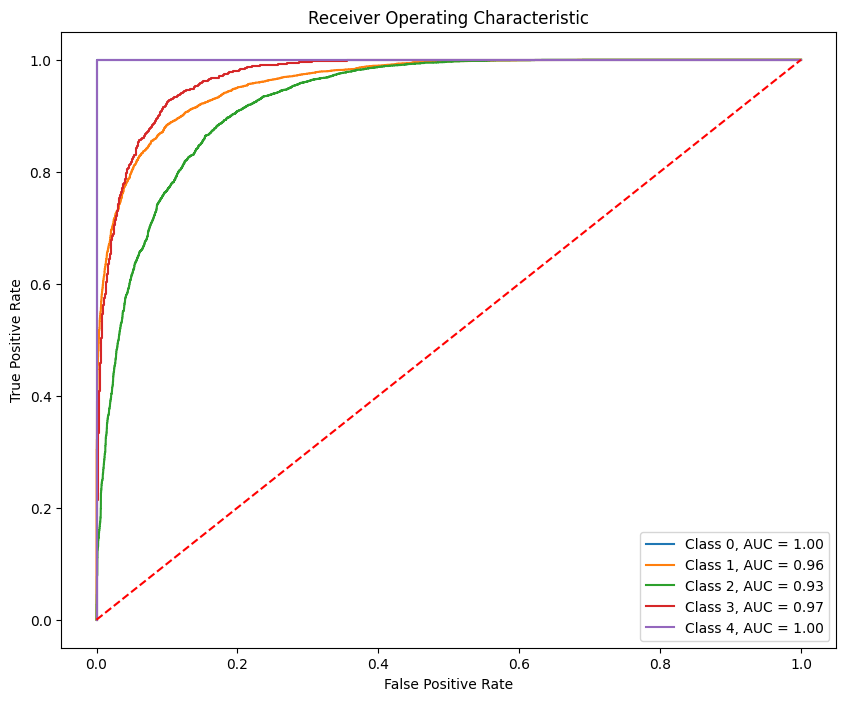

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained your XGBoost model and obtained predicted class probabilities
# y_pred_XGB should contain class probabilities for each class

# Initialize lists to store FPR, TPR, and AUC for each class
fpr_list = []
tpr_list = []
auc_list = []

# Loop through each class
for class_index in range(len(label_encoder.classes_)):
    # Create binary labels for the current class vs all others
    binary_labels = (y_train_encoded == class_index).astype(int)

    # Get the class probabilities for the current class
    class_probabilities = xgb_randomgrid.predict_proba(X_train)[:, class_index]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(binary_labels, class_probabilities)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Append FPR, TPR, and AUC to lists
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for class_index in range(len(label_encoder.classes_)):
    plt.plot(fpr_list[class_index], tpr_list[class_index], label=f'Class {class_index}, AUC = {auc_list[class_index]:.2f}')

plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


#Conclusion
1.Data preprocessing and cleaning is important to ensure that the data is clean and consistent. This can help to improve the performance of the machine learning models.
2.The exploration and visualization of the data can help to identify patterns and relationships between the different features. This can help to inform the selection of features for the machine learning models.
3.The performance of the machine learning models can be evaluated using a variety of metrics, such as the mean squared error. The choice of metric depends on the specific problem being solved.
4.Clustering and dimensionality reduction techniques can be used to identify patterns and relationships in the data that may not be obvious from the raw data.
5.Ensemble techniques can be used to improve the performance of machine learning models. These techniques combine the predictions of multiple models to produce a more accurate prediction.


